In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install roboflow

from roboflow import Roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 15529, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 15529 (delta 49), reused 119 (delta 43), pack-reused 15393
Receiving objects: 100% (15529/15529), 14.53 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (10578/10578), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=cfcd867df255abf3affd8f4e6d42d47dabfc1ad0ed94631a60b35e910b2ca35a
  Stored in directory: /root/.

In [ ]:
import torch
import os
from IPython.display import Image, clear_output

In [ ]:
os.environ["DATASET_DIRECTORY"]="/content/datasets"

In [ ]:

rf = Roboflow(api_key="ULwHCYvJfot1qaMRzNwT")
project = rf.workspace("bob-bfth9").project("cda-is")
dataset = project.version(3).download("yolov5")



loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/CDA-IS-3 in yolov5pytorch:: 100%|██████████| 406/406 [00:00<00:00, 2031.92it/s]


In [ ]:
!python train.py --img 1088 --batch 2 --epochs 10 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/CDA-IS-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=2, imgsz=1088, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2,

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/valid/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/datasets/CDA-IS-3/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CPU

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line

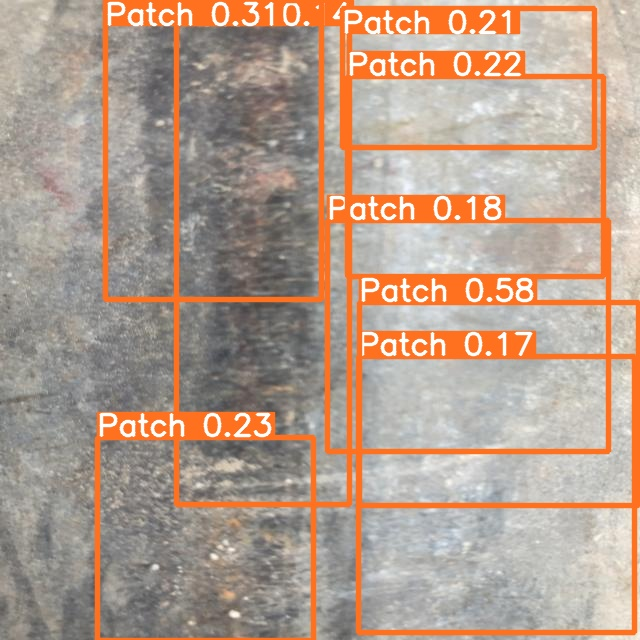

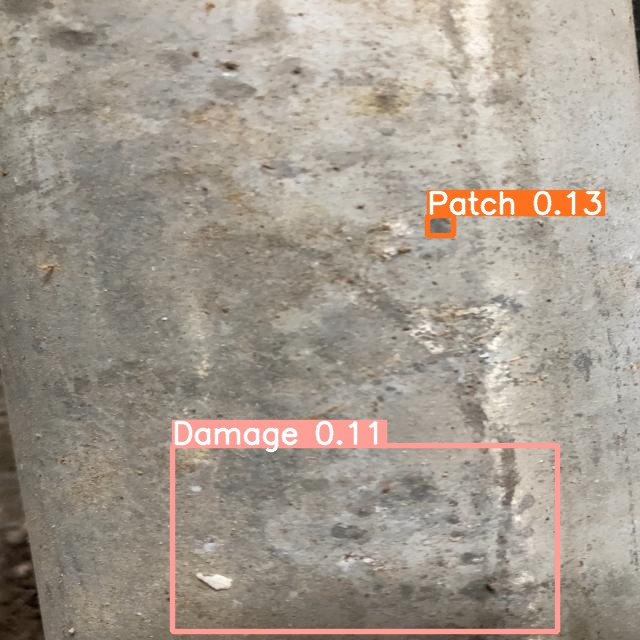

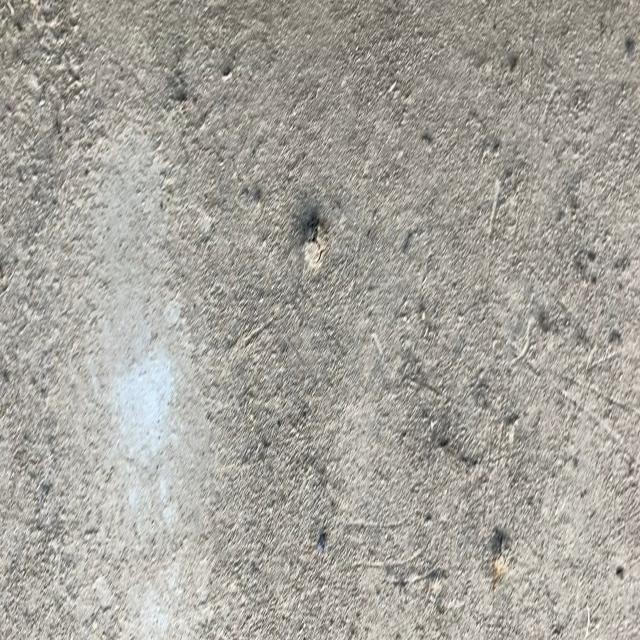

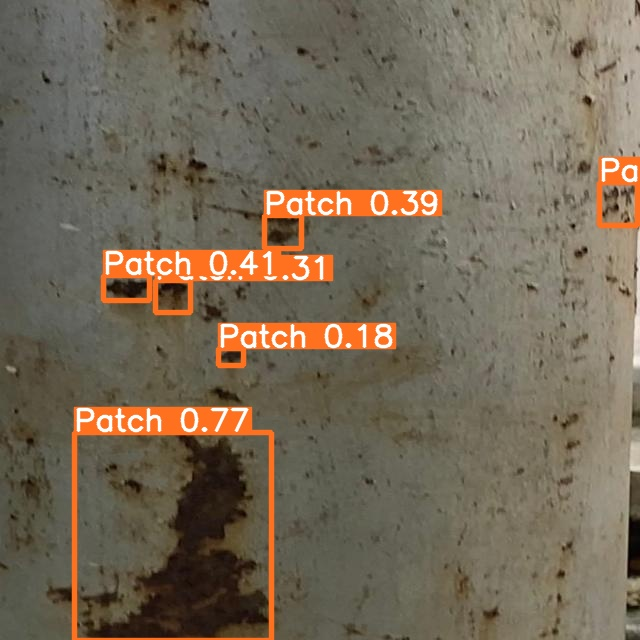

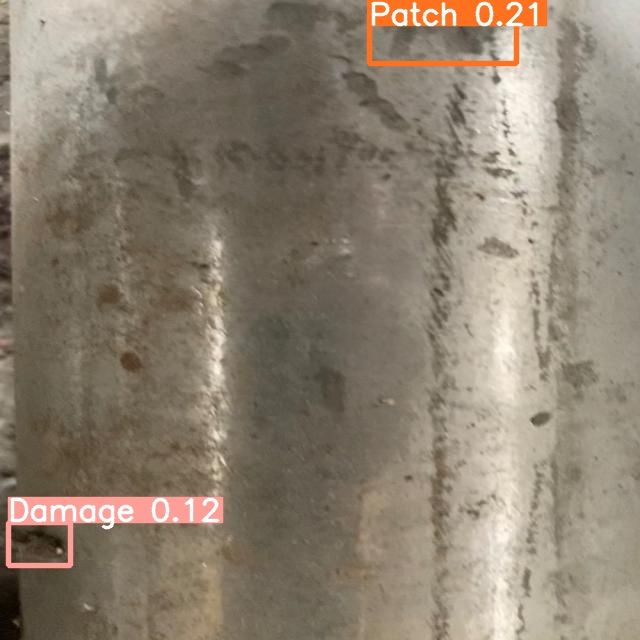

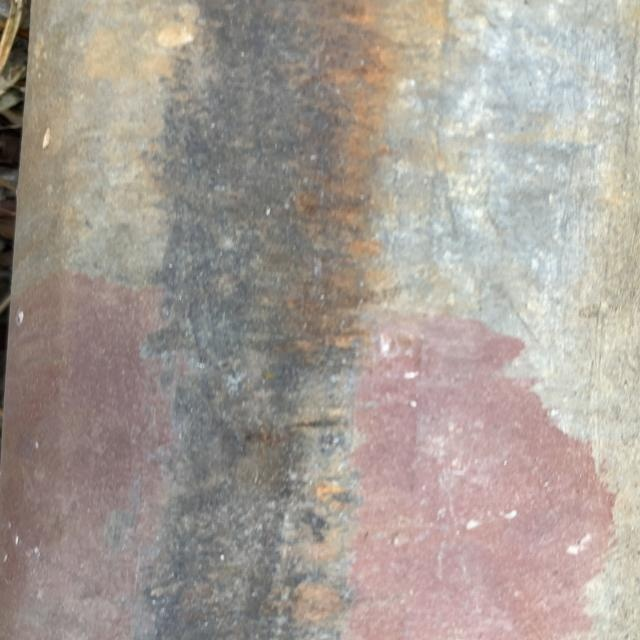

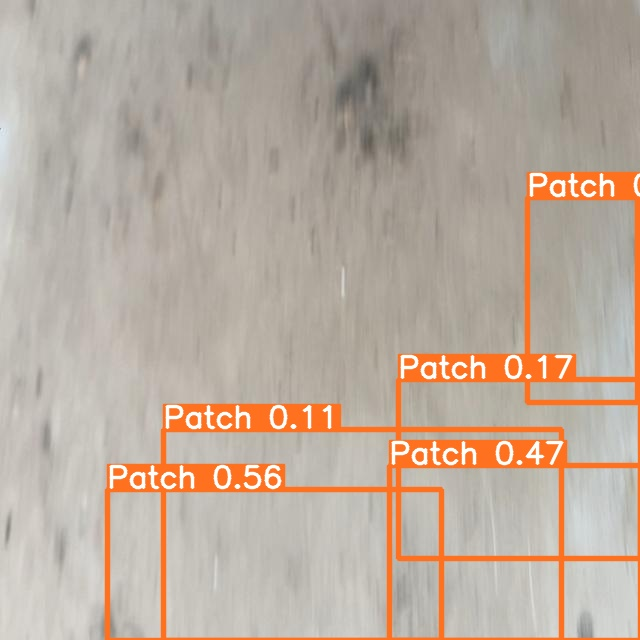

In [ ]:
import glob
from IPython.display import Image, display

i=0
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  i+=1
  if i<8:
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!python export.py --weights runs/train/exp/weights/best.pt --include tflite --img 640

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 11) (13.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

                 from  n    params  module                                  arguments                     
2023-04-16 12:16:54.148342: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  1      3520  models.

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best-fp16.tflite --img 640 --conf 0.1 --source {dataset.location}/valid/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best-fp16.tflite'], source=/content/datasets/Pipe-Analysis-2/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/yolov5/runs/train/exp/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/9 /content/datasets/Pipe-Analysis-2/valid/images/IMG_2310_MOV-4_jpg.rf.90c25a5faa8a98d9ce2d2d7a07766eb5.jpg: 640x640 1 bicycle, 1 car, 279.3ms
image 2/9 /conten